<a href="https://colab.research.google.com/github/emely3h/Geospatial_ML/blob/main/image_processing/image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traditional Image Segmentation

### 0. Prepare Colab, import dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#! ls
%cd drive/MyDrive/MachineLearning/
#! git clone https://github.com/emely3h/Geospatial_ML.git
%cd Geospatial_ML
! ls
#! git pull

/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning
/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning/Geospatial_ML
data_exploration  evaluation   models	    prepare_data    README.md
docs		  experiments  poetry.lock  pyproject.toml  requirements.txt


In [7]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from data_exploration.display_images import display 

In [4]:
total_tiles = 11121
train_tiles = 6672
test_val_tiles = 2224
data_path = "../data_colab/256_256"

In [5]:
mask  = np.load(os.path.join(data_path,'2022_06_20.npz'))['y_mask']
input  = np.load(os.path.join(data_path,'2022_06_20.npz'))['x_input']

print(mask.shape)
print(input.shape)

(761, 256, 256)
(761, 256, 256, 5)


## Thresholding

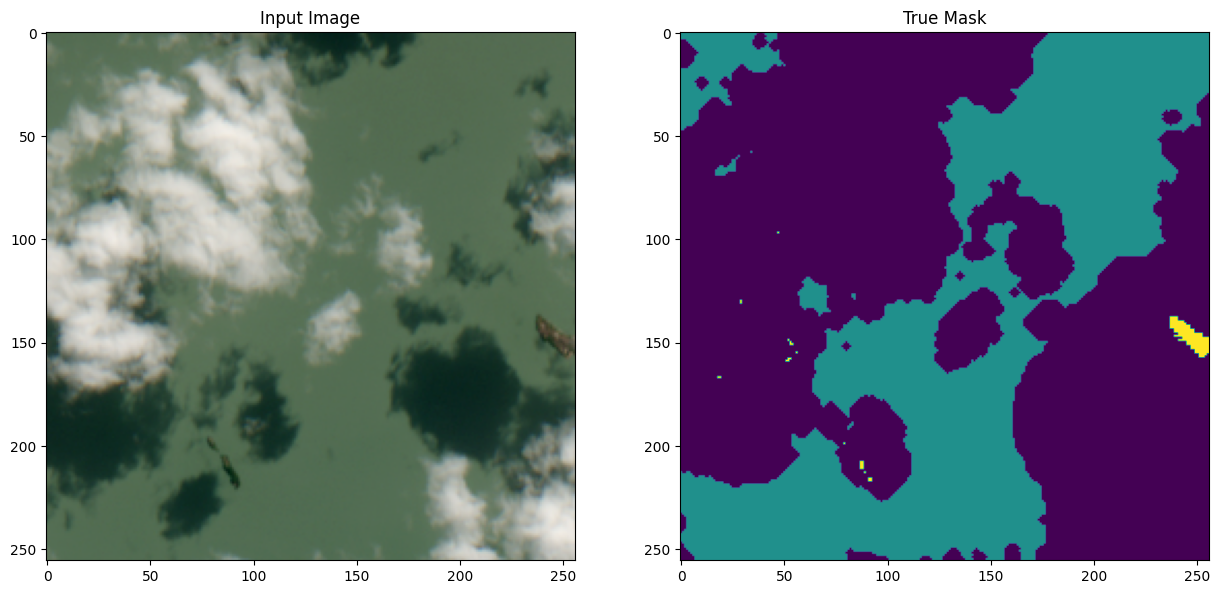

In [14]:
display(input[19:20], mask[19:20])

In [54]:
def thresholding(input_img, mask_img):
  rgb = input_img[:, :, :4]
  gray_img = np.mean(rgb, axis=2)
  gray_img = gray_img.astype(np.uint8)
  plt.figure(figsize=(10,10))
  plt.imshow(gray_img, cmap='gray')
  plt.colorbar()
  plt.show()

  # Set a threshold value to separate dark and bright pixels
  threshold_dark = 128
  threshold_bright = 180

  # Create a binary mask based on the threshold
  filter_dark = np.where(gray_img > threshold_dark, 255, 0).astype(np.uint8)
  filter_dark = np.max(filter_dark) - filter_dark
  filter_bright = np.where(gray_img > threshold_bright, 255, 0).astype(np.uint8)

  threshold_mask = filter_dark + filter_bright

  # Display the original grayscale image and the binary image
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))
  axes[0].imshow(gray_img, cmap='gray')
  axes[0].set_title('Grayscale Image')
  axes[0].axis('off')
  axes[1].imshow(threshold_mask, cmap='gray')
  axes[1].set_title('Binary Image')
  axes[1].axis('off')
  gray_mask = np.max(mask_img) - mask_img 
  axes[2].imshow(mask_img)
  axes[2].set_title('True mask')
  axes[2].axis('off')
  plt.show()


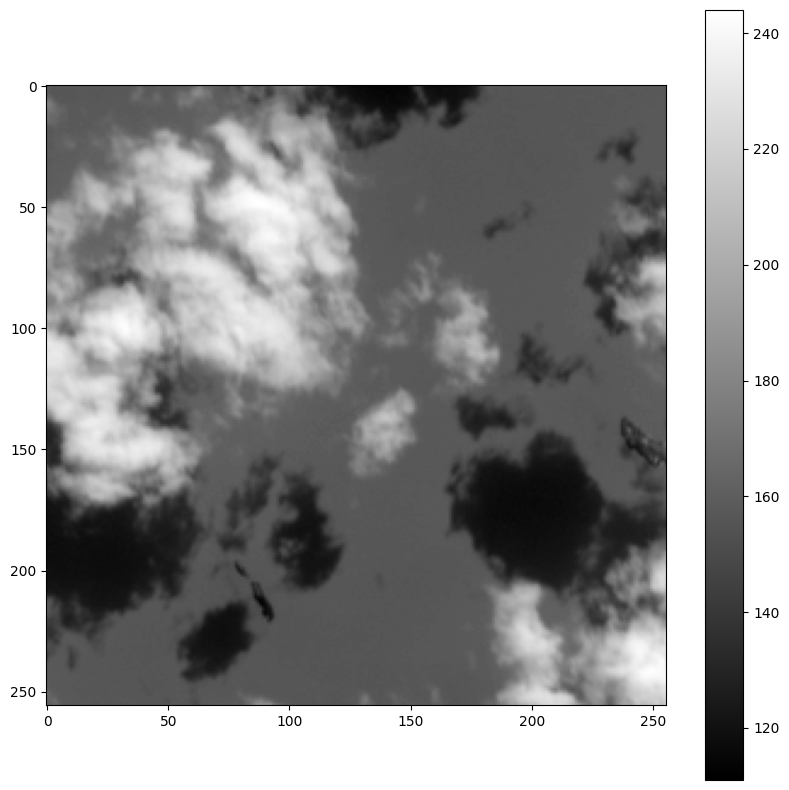

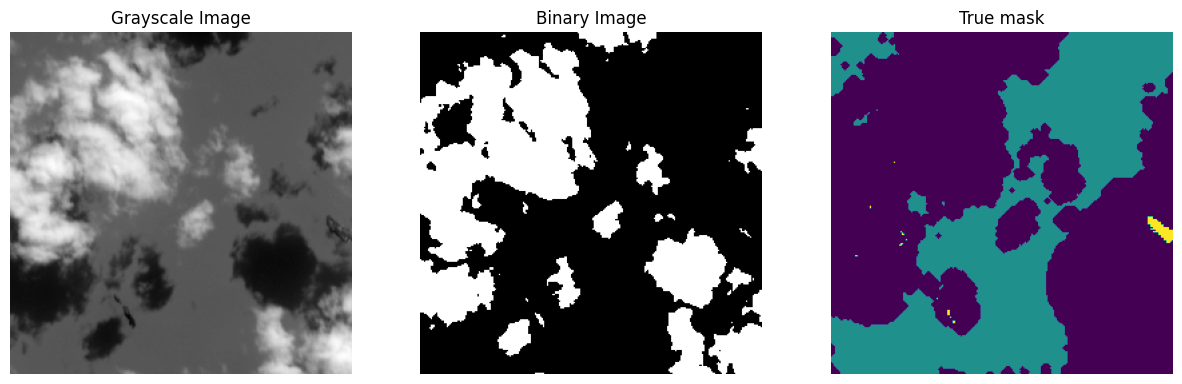

In [55]:
thresholding(input[19], mask[19])

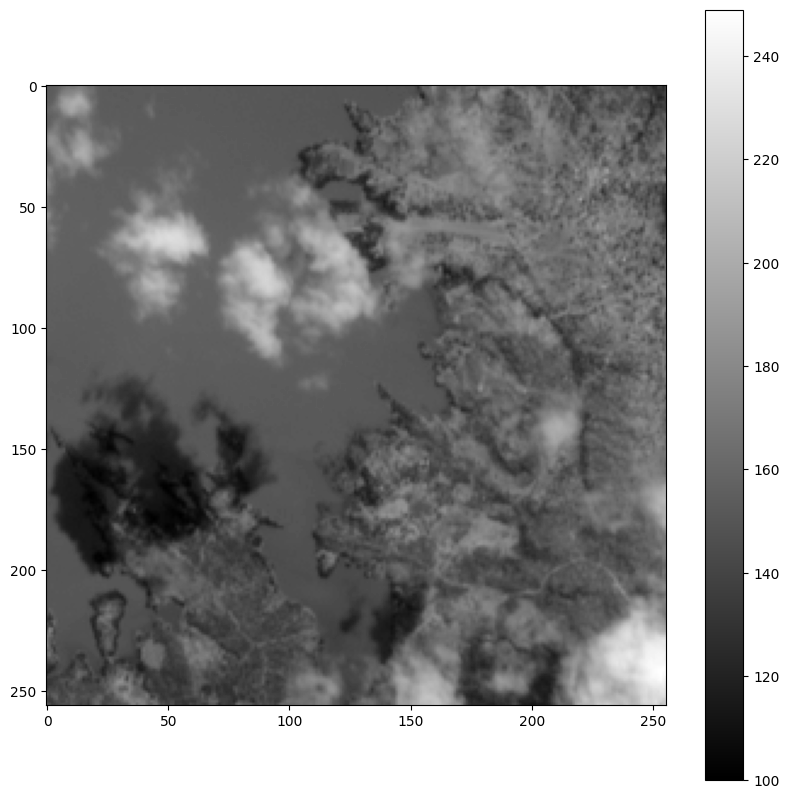

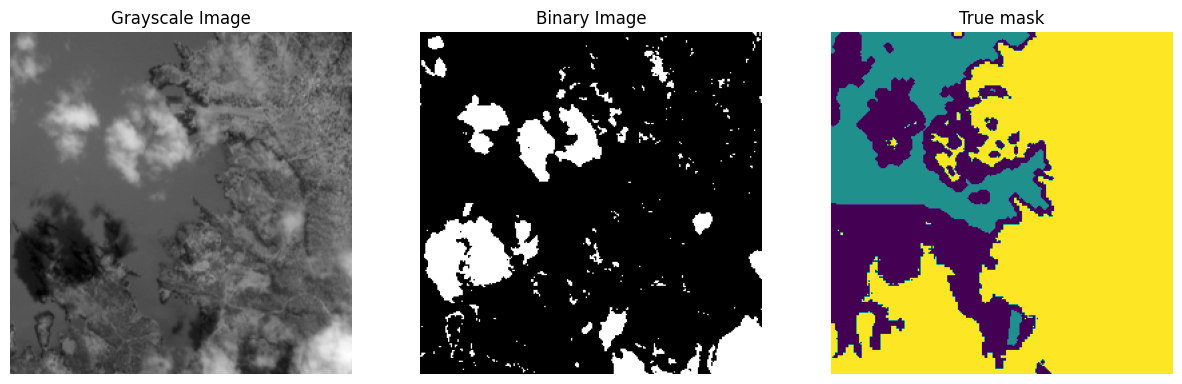

In [56]:
thresholding(input[27], mask[27])

Problems: 
- hard to distinguish land and cloud shadows
- How to distinguish clouds over water and clouds over land?
- thresholds different depending on sunlight, time of day, part of the lake, water quality, ....
- to mask pixels that have been classified wrongly as valid, surrounding highly pixels relevant

## Region-Based

## Clustering